In [1]:
cd ..

/Users/yanndubois/Desktop/GitHub/alpaca_eval


In [2]:

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from alpaca_eval import constants

/Users/yanndubois/opt/anaconda3/envs/alpaca_eval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [75]:
import pandas as pd
import seaborn as sns
from notebooks.helpers import save_fig

In [454]:
import numpy as np

def get_benchmark_correlations(n_min_models = 25):
    min_periods = n_min_models - 1
    df = pd.read_csv("notebooks/benchmarks.csv", index_col=0)
    
    df.columns = [c.split("\n")[0] for c in df.columns]
    df = df.drop(columns=["AlpacaEval 2.0", "AlpacaEval 1.0"])
    df_corr = df.corr(method="spearman", min_periods=min_periods).dropna(how="all", axis=0).dropna(how="all", axis=1)
    #order by performance
    df_corr = df.loc[:,df_corr["Arena Elo"].sort_values(ascending=False).index].corr(method="spearman", min_periods=min_periods)
    return df_corr

def is_color_brewer_cmap(cmap_name):
    # hack that works for many cases
    return sum(1 for c in cmap_name if c.isupper()) == sum(1 for c in cmap_name if c.islower())
    
def plot_benchmark_correlations(scale=0.8, is_only_arena=True, is_transpose=False, n_min_models=25, title = 'Chat Arena Spearman correlation',
                                cmap_name="YlGnBu",
                                **kwargs):
    df_corr = get_benchmark_correlations(n_min_models=n_min_models)
    
    # Generate a custom diverging colormap
    if is_color_brewer_cmap(cmap_name) :    
        cmap = sns.color_palette(cmap_name, as_cmap=True)
        cmap = plt.cm.colors.ListedColormap(cmap(np.linspace(1, 0, 256)**0.8))
    elif cmap_name == "coolwarm":
        cmap = sns.color_palette(cmap_name, as_cmap=True)
        cmap = plt.cm.colors.ListedColormap(cmap(np.linspace(0, 1, 256)**2))
    else:
        cmap = sns.color_palette(cmap_name, as_cmap=True)
    plt.figure(figsize=(scale*len(df_corr), scale*len(df_corr)*3/4)) 

    if is_only_arena:
        df_corr = df_corr.iloc[1:].loc[:, ["Arena Elo"]]
        if is_transpose:
            df_corr = df_corr.T.iloc[:,::-1]
    else:
        kwargs["mask"] = np.triu(np.ones_like(df_corr, dtype=bool))

    f = sns.heatmap(df_corr , annot=True, fmt=".2f", linewidth=.5, cmap=cmap, 
                cbar_kws={"shrink": .8}, vmin=0.5, vmax=1, cbar=False, square=True, **kwargs);
    
    # Rotate x-axis labels for better readability
    _=plt.yticks(fontsize=12)
    _=plt.xticks(rotation=45, ha='right', fontsize=12)

    if is_only_arena:
        if is_transpose:
            _ = plt.yticks([])
            title += "\n"
            _ = plt.title(title, fontsize=14) 
        else:
            _ = plt.xticks([])
            _ = plt.ylabel(title, fontsize=14) 
    else:
        _ = plt.title(title, fontsize=14) 

    return f
        

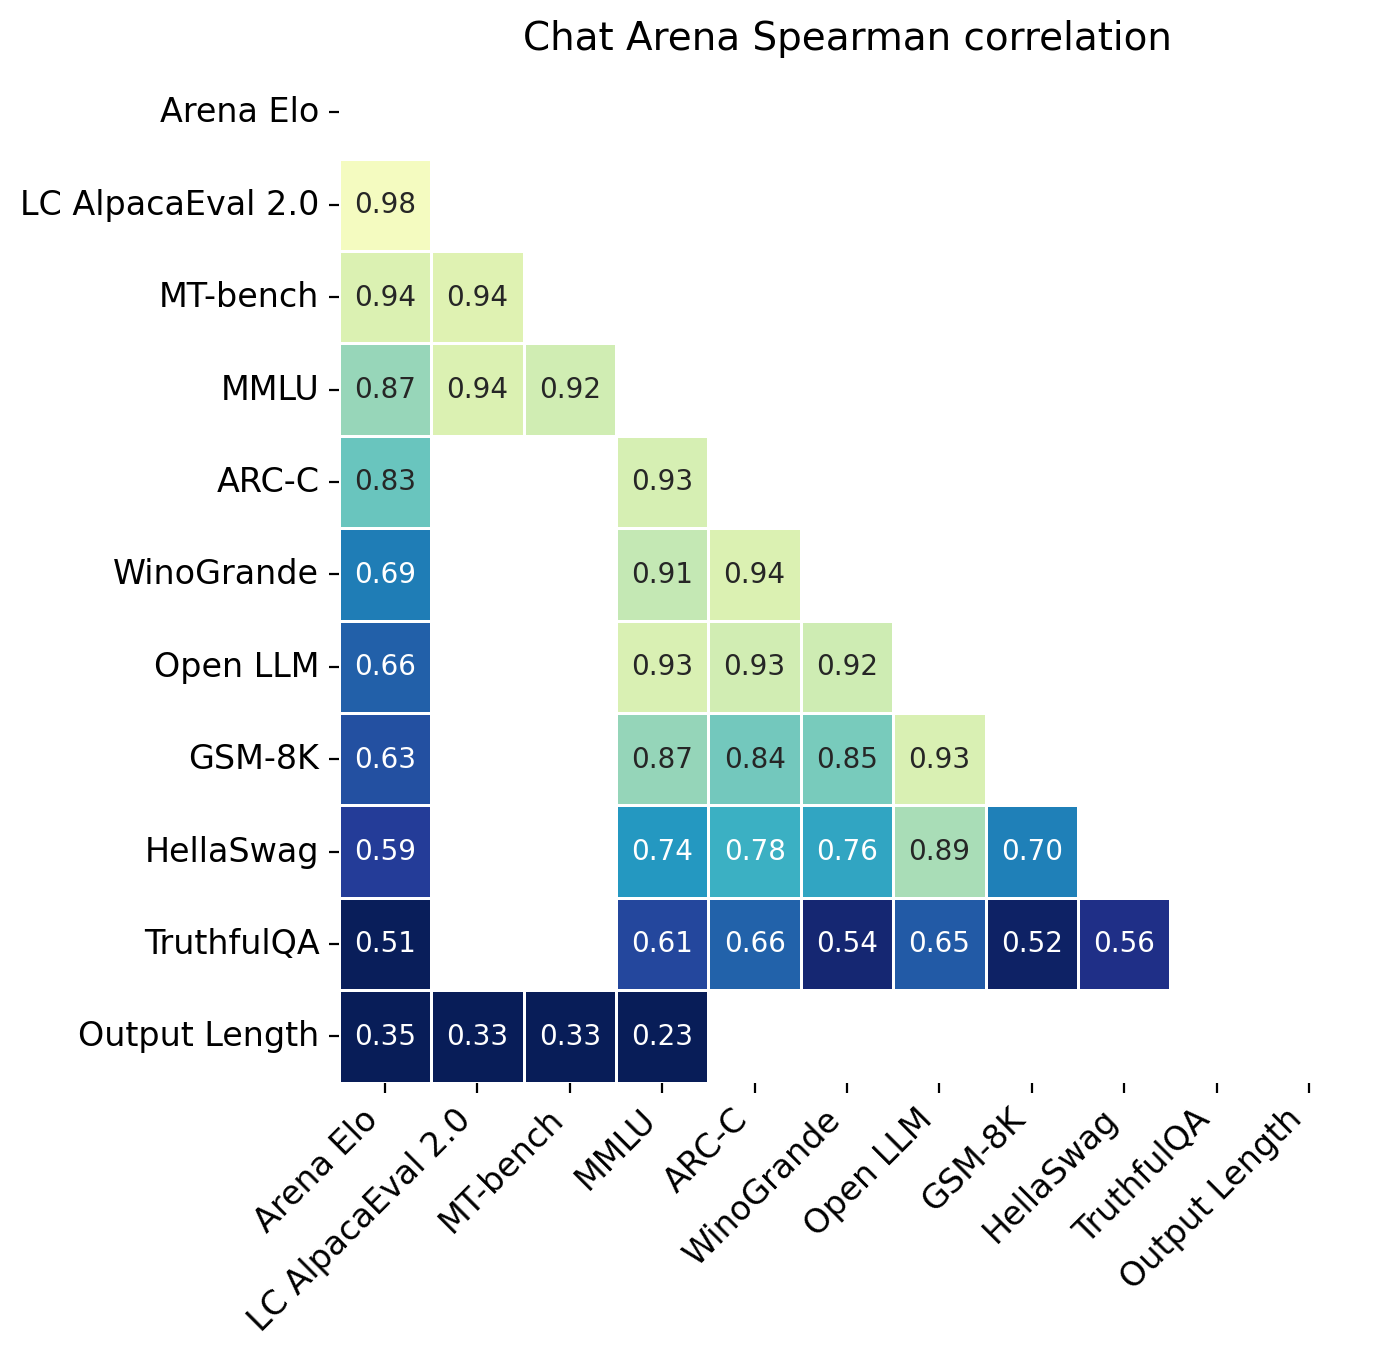

In [455]:
_=plot_benchmark_correlations(is_only_arena=False)

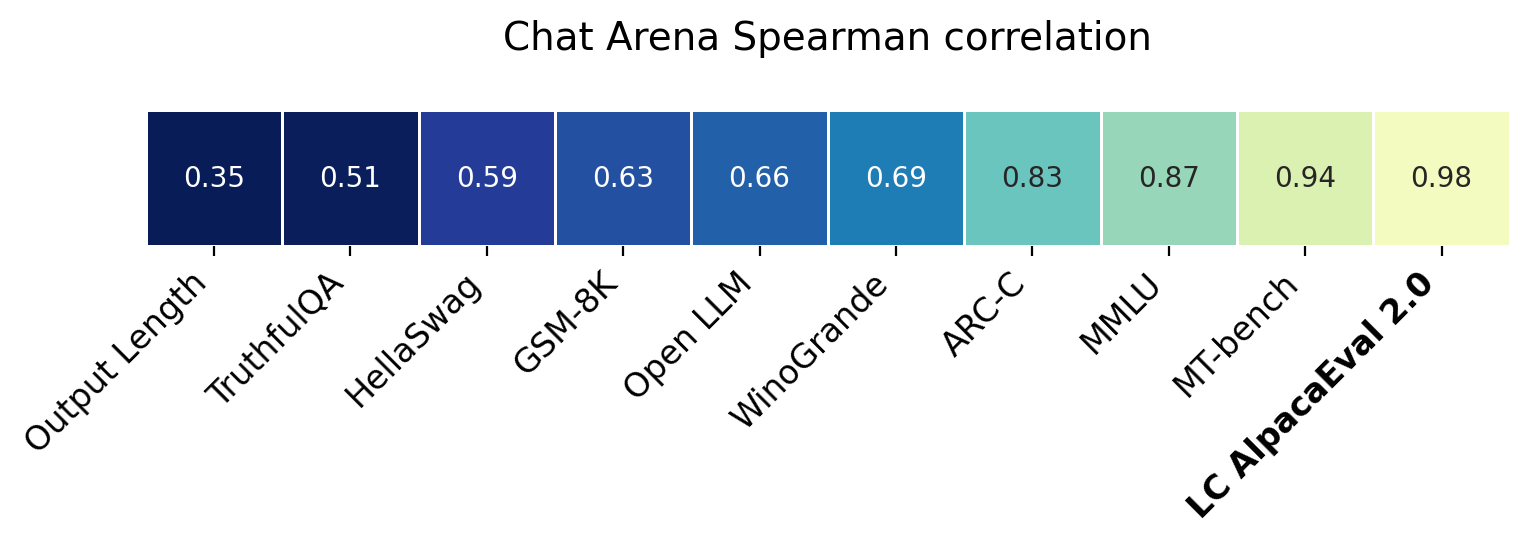

In [456]:
ax=plot_benchmark_correlations(is_only_arena=True, is_transpose=True) # cmap_name="coolwarm")
#plt.gca().get_xticklabels()[-1].set_color('red')
plt.gca().get_xticklabels()[-1].set_fontweight('bold')
plt.show()
save_fig(ax, filename="notebooks/chat_correlations.png")